<a href="https://colab.research.google.com/github/chauhanneha16/TopUniversitypredictionapp/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

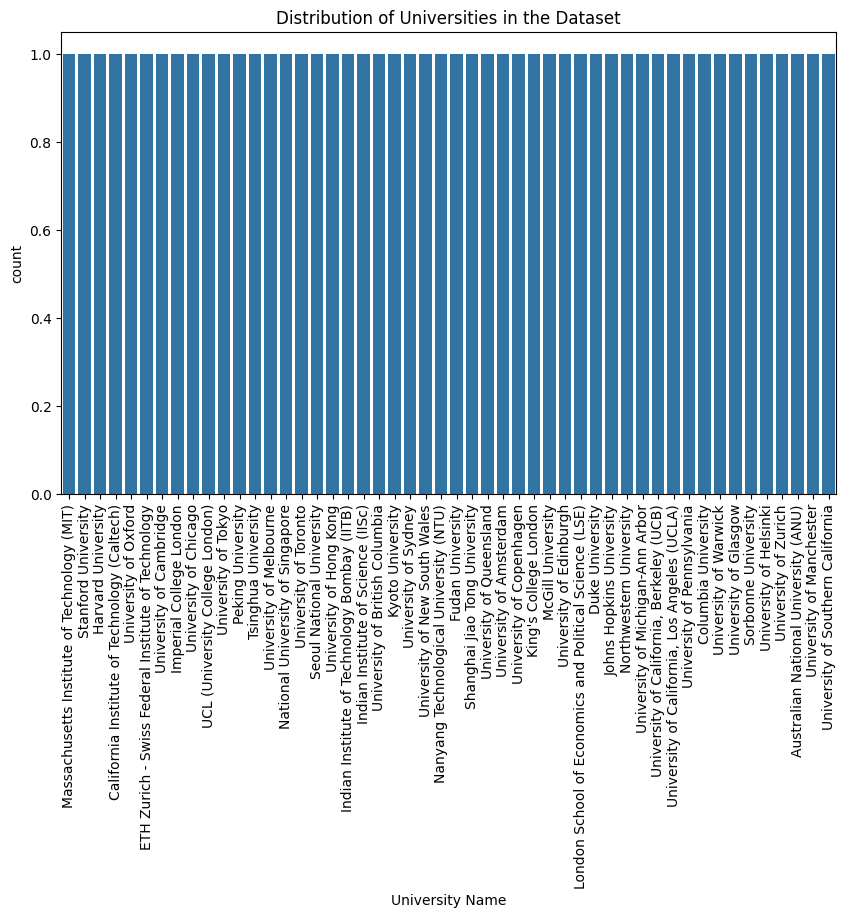

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/university_data.csv")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='University Name')
plt.xticks(rotation=90)
plt.title('Distribution of Universities in the Dataset')
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder
import pickle

df = pd.read_csv("/content/university_data.csv")

# Encode the university names
label_encoder_uni = LabelEncoder()
df['University Name'] = label_encoder_uni.fit_transform(df['University Name'])

# Save the label encoder
with open('label_encoder_uni.pkl', 'wb') as f:
    pickle.dump(label_encoder_uni, f)

print(label_encoder_uni.classes_)


['Australian National University (ANU)'
 'California Institute of Technology (Caltech)' 'Columbia University'
 'Duke University' 'ETH Zurich - Swiss Federal Institute of Technology'
 'Fudan University' 'Harvard University' 'Imperial College London'
 'Indian Institute of Science (IISc)'
 'Indian Institute of Technology Bombay (IITB)' 'Johns Hopkins University'
 "King's College London" 'Kyoto University'
 'London School of Economics and Political Science (LSE)'
 'Massachusetts Institute of Technology (MIT)' 'McGill University'
 'Nanyang Technological University (NTU)'
 'National University of Singapore' 'Northwestern University'
 'Peking University' 'Seoul National University'
 'Shanghai Jiao Tong University' 'Sorbonne University'
 'Stanford University' 'Tsinghua University'
 'UCL (University College London)' 'University of Amsterdam'
 'University of British Columbia'
 'University of California, Berkeley (UCB)'
 'University of California, Los Angeles (UCLA)' 'University of Cambridge'
 'U

In [4]:
from sklearn.preprocessing import LabelEncoder
import pickle

df = pd.read_csv("/content/university_data.csv")

# Encode the university names
label_encoder_uni = LabelEncoder()
df['University Name'] = label_encoder_uni.fit_transform(df['University Name'])

# Save the label encoder
with open('label_encoder_uni.pkl', 'wb') as f:
    pickle.dump(label_encoder_uni, f)

print(label_encoder_uni.classes_)


['Australian National University (ANU)'
 'California Institute of Technology (Caltech)' 'Columbia University'
 'Duke University' 'ETH Zurich - Swiss Federal Institute of Technology'
 'Fudan University' 'Harvard University' 'Imperial College London'
 'Indian Institute of Science (IISc)'
 'Indian Institute of Technology Bombay (IITB)' 'Johns Hopkins University'
 "King's College London" 'Kyoto University'
 'London School of Economics and Political Science (LSE)'
 'Massachusetts Institute of Technology (MIT)' 'McGill University'
 'Nanyang Technological University (NTU)'
 'National University of Singapore' 'Northwestern University'
 'Peking University' 'Seoul National University'
 'Shanghai Jiao Tong University' 'Sorbonne University'
 'Stanford University' 'Tsinghua University'
 'UCL (University College London)' 'University of Amsterdam'
 'University of British Columbia'
 'University of California, Berkeley (UCB)'
 'University of California, Los Angeles (UCLA)' 'University of Cambridge'
 'U

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 0s 5ms/step


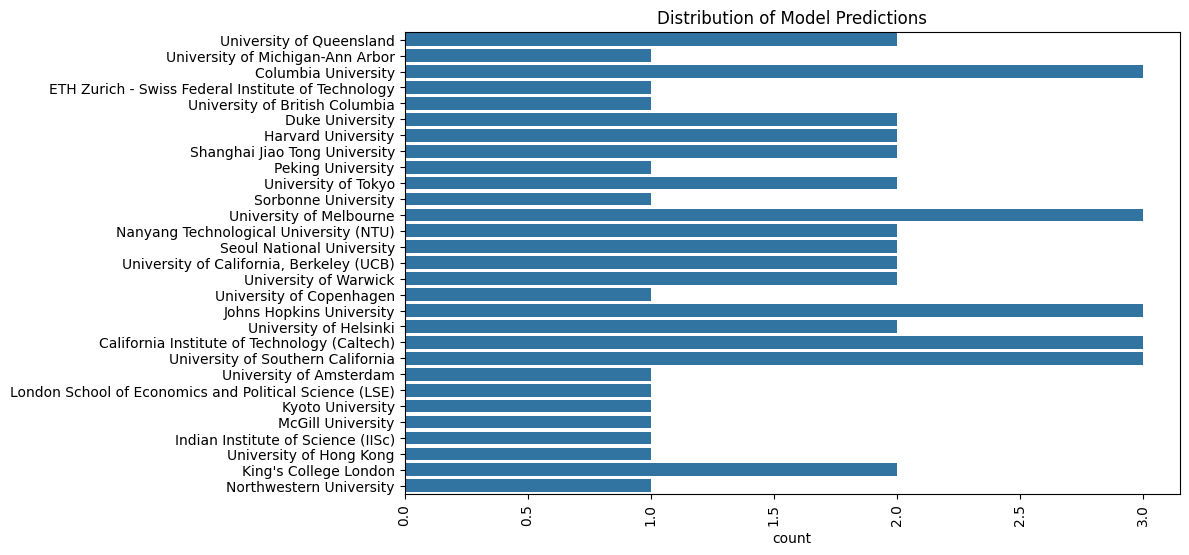

In [7]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Load the trained model and preprocessors
model = tf.keras.models.load_model('/content/university_recommendation_model.h5')
scaler = pickle.load(open('/content/scaler.pkl', 'rb'))
label_encoder_uni = pickle.load(open('/content/label_encoder_uni.pkl', 'rb'))

# Select a sample from the dataset
sample_data = df[["Science Marks", "Maths Marks", "History Marks", "English Marks", "GRE Marks"]].values
sample_data = scaler.transform(sample_data)

predictions = model.predict(sample_data)
predicted_unis = label_encoder_uni.inverse_transform(np.argmax(predictions, axis=1))

plt.figure(figsize=(10, 6))
sns.countplot(predicted_unis)
plt.xticks(rotation=90)
plt.title('Distribution of Model Predictions')
plt.show()


In [9]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv("/content/university_data.csv")

# Preprocess the data
marks_columns = ["Science Marks", "Maths Marks", "History Marks", "English Marks", "GRE Marks"]
scaler = StandardScaler()
df[marks_columns] = scaler.fit_transform(df[marks_columns])

X = df[marks_columns]
y = df["University Name"]

# Encode the university names
label_encoder_uni = LabelEncoder()
y_encoded = label_encoder_uni.fit_transform(y)

# Save the scaler and label encoder
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoder_uni.pkl', 'wb') as f:
    pickle.dump(label_encoder_uni, f)

# Build the model
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y_encoded, epochs=50, batch_size=4, validation_split=0.2)  # Adding validation split

# Save the model
model.save('/content/university_recommendation_model.h5')


Epoch 1/50
10/10 [==============================] - 1s 56ms/step - loss: 3.9285 - accuracy: 0.0000e+00 - val_loss: 4.0832 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 15ms/step - loss: 3.8331 - accuracy: 0.0250 - val_loss: 4.1372 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 14ms/step - loss: 3.7590 - accuracy: 0.0250 - val_loss: 4.2048 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 3.6848 - accuracy: 0.0500 - val_loss: 4.2703 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 3.6077 - accuracy: 0.0750 - val_loss: 4.3474 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 0s 11ms/step - loss: 3.5277 - accuracy: 0.1750 - val_loss: 4.4358 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 3.4384 - accuracy: 0.1750 - val_loss: 4.5326 - val_acc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
